# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [2]:
data = pd.read_csv('social_media.csv')


In [3]:
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


# Data Preprocessing

In [4]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Hours Per Day',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [5]:

titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [6]:
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [7]:
# Droping unnecessary columns

In [8]:
data.drop(columns=['Timestamp', 'Affiliations'], inplace=True)


In [9]:
titles = list(data.columns)
titles

['Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  481 non-null    float64
 1   Gender               481 non-null    object 
 2   Relationship Status  481 non-null    object 
 3   Occupation           481 non-null    object 
 4   Social Media User?   481 non-null    object 
 5   Platforms Used       481 non-null    object 
 6   Hours Per Day        481 non-null    object 
 7   ADHD Q1              481 non-null    int64  
 8   ADHD Q2              481 non-null    int64  
 9   ADHD Q3              481 non-null    int64  
 10  ADHD Q4              481 non-null    int64  
 11  Anxiety Q1           481 non-null    int64  
 12  Anxiety Q2           481 non-null    int64  
 13  Self Esteem Q1       481 non-null    int64  
 14  Self Esteem Q2       481 non-null    int64  
 15  Self Esteem Q3       481 non-null    int

In [11]:
# Gender

In [12]:
Genders = set(data['Gender'])
print(Genders)

{'Female', 'Non binary ', 'Nonbinary ', 'unsure ', 'Non-binary', 'NB', 'There are others???', 'Trans', 'Male'}


In [13]:
data.replace('Non-binary','Non-Binary', inplace=True)
data.replace('Nonbinary ','Non-Binary', inplace=True)
data.replace('NB','Non-Binary', inplace=True)
data.replace('Non binary ','Non-Binary', inplace=True)
Genders = set(data['Gender'])
print(Genders)

{'Female', 'Non-Binary', 'unsure ', 'There are others???', 'Trans', 'Male'}


In [14]:

print(data['Age'].dtype)
non_integer_age_rows = data[~data['Age'].apply(lambda x: x.is_integer())]
print(non_integer_age_rows)

float64
      Age  Gender Relationship Status          Occupation Social Media User?  \
382  26.7  Female              Single  University Student                Yes   

        Platforms Used      Hours Per Day  ADHD Q1  ADHD Q2  ADHD Q3  ADHD Q4  \
382  Facebook, YouTube  More than 5 hours        4        2        3        3   

     Anxiety Q1  Anxiety Q2  Self Esteem Q1  Self Esteem Q2  Self Esteem Q3  \
382           2           5               5               2               3   

     Depression Q1  Depression Q2  Depression Q3  
382              4              5              5  


In [15]:
data.loc[382,'Age']

26.7

In [16]:

data['Age'] = data['Age'].astype('int64')
print(data['Age'].dtype)
data.info()

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  481 non-null    int64 
 1   Gender               481 non-null    object
 2   Relationship Status  481 non-null    object
 3   Occupation           481 non-null    object
 4   Social Media User?   481 non-null    object
 5   Platforms Used       481 non-null    object
 6   Hours Per Day        481 non-null    object
 7   ADHD Q1              481 non-null    int64 
 8   ADHD Q2              481 non-null    int64 
 9   ADHD Q3              481 non-null    int64 
 10  ADHD Q4              481 non-null    int64 
 11  Anxiety Q1           481 non-null    int64 
 12  Anxiety Q2           481 non-null    int64 
 13  Self Esteem Q1       481 non-null    int64 
 14  Self Esteem Q2       481 non-null    int64 
 15  Self Esteem Q3       481 non-null    int64 
 16  De

In [17]:
# Handling Missing,null Values

In [18]:

data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1


# Data Aggragation

In [19]:
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)
Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)
SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)
Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)
Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
data['Total Score'] = data[Total].sum(axis=1)
data.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)
data.head(5)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,7,14,43
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,12,6,8,9,35
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44


In [20]:

hour_counts = data['Hours Per Day'].value_counts()
print("Counts of Hours Spent Per Day:")
print(hour_counts)

Counts of Hours Spent Per Day:
Hours Per Day
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: count, dtype: int64


In [21]:
data.loc[data['Hours Per Day'] == 'More than 5 hours', 'Hours Per Day'] = '5.5h'
data.loc[data['Hours Per Day'] == 'Between 2 and 3 hours', 'Hours Per Day'] = '2.5h'
data.loc[data['Hours Per Day'] == 'Between 3 and 4 hours', 'Hours Per Day'] = '3.5h'
data.loc[data['Hours Per Day'] == 'Between 1 and 2 hours', 'Hours Per Day'] = '1.5h'
data.loc[data['Hours Per Day'] == 'Between 4 and 5 hours', 'Hours Per Day'] = '4.5h'
data.loc[data['Hours Per Day'] == 'Less than an Hour', 'Hours Per Day'] = '0.5h'
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5h,18,4,7,14,43
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5h,15,7,7,14,43
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",3.5h,11,6,7,11,35
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",5.5h,12,6,8,9,35
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",2.5h,17,9,9,9,44


In [22]:

no_answers = data[data['Social Media User?'] == 'No']
print("Rows with 'No' answers:")
print(no_answers)

Rows with 'No' answers:
     Age Gender Relationship Status          Occupation Social Media User?  \
9     20   Male              Single  University Student                 No   
54    26   Male   In a relationship     Salaried Worker                 No   
134   50   Male            Divorced     Salaried Worker                 No   

               Platforms Used Hours Per Day  ADHD Score  Anxiety Score  \
9           Reddit, Pinterest          0.5h           4              2   
54   YouTube, Discord, Reddit          1.5h           8              3   
134        Instagram, YouTube          1.5h           7              3   

     Self Esteem Score  Depression Score  Total Score  
9                    3                 3           12  
54                   5                 6           22  
134                  4                 5           19  


In [23]:
data.loc[data['Social Media User?'] == 'No', 'Social Media User?'] = 'Yes'
social_media_user_counts = data['Social Media User?'].value_counts()
print("Counts of Social Media User?:")
print(social_media_user_counts)

Counts of Social Media User?:
Social Media User?
Yes    481
Name: count, dtype: int64


In [24]:
# Age

In [25]:

Age_counts = data['Age'].value_counts()
Age_counts = Age_counts.sort_index(ascending=True)
print("Counts Age (Ascending Order):")
print(Age_counts)

Counts Age (Ascending Order):
Age
13     2
14     4
15     2
16     2
17     9
18    13
19    19
20    45
21    82
22    81
23    42
24    27
25    17
26    19
27    11
28     5
29     6
30     6
31     1
32     4
33     2
34     6
35     8
36     3
37     4
38     3
40     2
42     1
43     1
44     2
45     1
46     2
47    16
48    13
49     3
50     6
51     2
52     1
53     1
55     1
56     2
60     1
65     1
69     1
91     1
Name: count, dtype: int64


In [26]:

age_answers = data[data['Age'] == 91]
print("Rows with Age equal to 91:")
print(age_answers)

Rows with Age equal to 91:
     Age  Gender Relationship Status          Occupation Social Media User?  \
256   91  Female              Single  University Student                Yes   

                                      Platforms Used Hours Per Day  \
256  Facebook, Instagram, YouTube, Snapchat, Discord          2.5h   

     ADHD Score  Anxiety Score  Self Esteem Score  Depression Score  \
256          16              9                 11                15   

     Total Score  
256           51  


In [27]:

data.loc[data['Age'] == 91, 'Age'] = 19
print("Row 256:")
print(data.iloc[256])

Row 256:
Age                                                                 19
Gender                                                          Female
Relationship Status                                             Single
Occupation                                          University Student
Social Media User?                                                 Yes
Platforms Used         Facebook, Instagram, YouTube, Snapchat, Discord
Hours Per Day                                                     2.5h
ADHD Score                                                          16
Anxiety Score                                                        9
Self Esteem Score                                                   11
Depression Score                                                    15
Total Score                                                         51
Name: 256, dtype: object


In [28]:
data.columns

Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Platforms Used', 'Hours Per Day', 'ADHD Score',
       'Anxiety Score', 'Self Esteem Score', 'Depression Score',
       'Total Score'],
      dtype='object')

In [29]:

def categorize_platforms(platforms_used):
    categories = []
    if any(platform in platforms_used for platform in ['Facebook', 'Twitter', 'Discord', 'TikTok']):
        categories.append('SN')
    if any(platform in platforms_used for platform in ['Pinterest', 'YouTube', 'Snapchat', 'Instagram']):
        categories.append('MS')
    if 'Reddit' in platforms_used:
        categories.append('DF')
    return ', '.join(categories) if categories else 'Other/Unknown'
data['Platforms'] = data['Platforms Used'].apply(categorize_platforms)
data.drop(columns=['Platforms Used'], inplace=True)
print(data)


     Age  Gender Relationship Status          Occupation Social Media User?  \
0     21    Male   In a relationship  University Student                Yes   
1     21  Female              Single  University Student                Yes   
2     21  Female              Single  University Student                Yes   
3     21  Female              Single  University Student                Yes   
4     21  Female              Single  University Student                Yes   
..   ...     ...                 ...                 ...                ...   
476   24    Male              Single     Salaried Worker                Yes   
477   26  Female             Married     Salaried Worker                Yes   
478   29  Female             Married     Salaried Worker                Yes   
479   21    Male              Single  University Student                Yes   
480   53    Male             Married     Salaried Worker                Yes   

    Hours Per Day  ADHD Score  Anxiety Score  Self 

In [30]:
data.head(10)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms
0,21,Male,In a relationship,University Student,Yes,2.5h,18,4,7,14,43,"SN, MS, DF"
1,21,Female,Single,University Student,Yes,5.5h,15,7,7,14,43,"SN, MS, DF"
2,21,Female,Single,University Student,Yes,3.5h,11,6,7,11,35,"SN, MS"
3,21,Female,Single,University Student,Yes,5.5h,12,6,8,9,35,"SN, MS"
4,21,Female,Single,University Student,Yes,2.5h,17,9,9,9,44,"SN, MS"
5,22,Female,Single,University Student,Yes,2.5h,14,6,9,9,38,"SN, MS"
6,21,Female,Married,University Student,Yes,3.5h,12,6,12,13,43,"SN, MS"
7,21,Female,In a relationship,University Student,Yes,5.5h,11,6,5,11,33,"SN, MS"
8,21,Female,In a relationship,University Student,Yes,5.5h,11,4,5,11,31,"SN, MS"
9,20,Male,Single,University Student,Yes,0.5h,4,2,3,3,12,"MS, DF"


# Data visualization

In [31]:
# Age

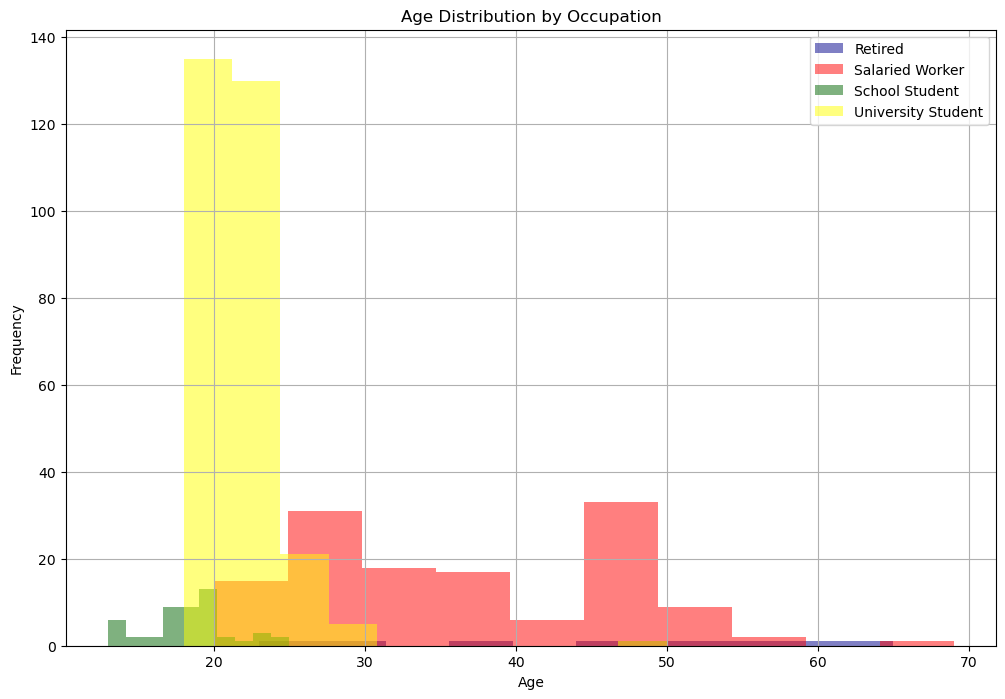

In [32]:

colors = {
    'Retired': 'darkblue',
    'University Student': 'yellow',
    'School Student': 'darkgreen',
    'Salaried Worker': 'red',
}
grouped_ages = data.groupby('Occupation')['Age']
plt.figure(figsize=(12, 8))
for occupation, ages in grouped_ages:
    plt.hist(ages, bins=10, alpha=0.5, label=occupation, color=colors.get(occupation, 'gray'))

plt.title('Age Distribution by Occupation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

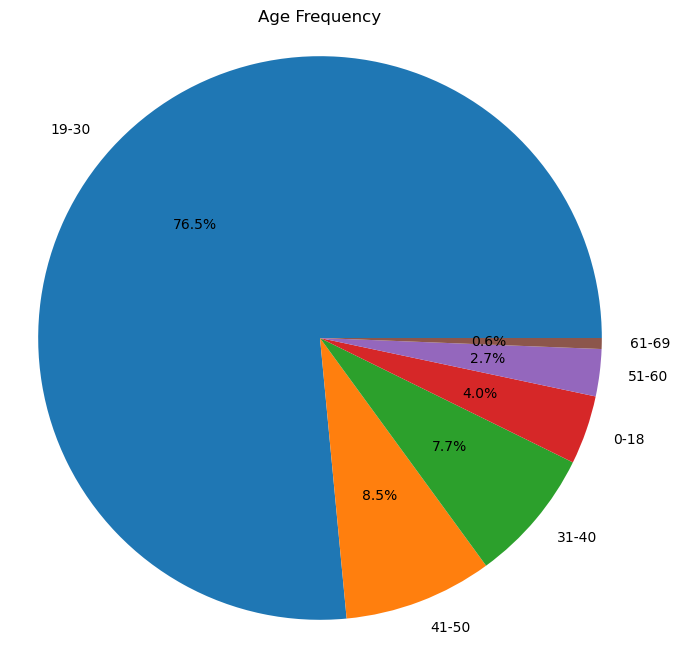

In [33]:

bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-69']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_group_counts = data['Age Group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Frequency')
plt.axis('equal')  
plt.show()

In [34]:
# Gender Distribution

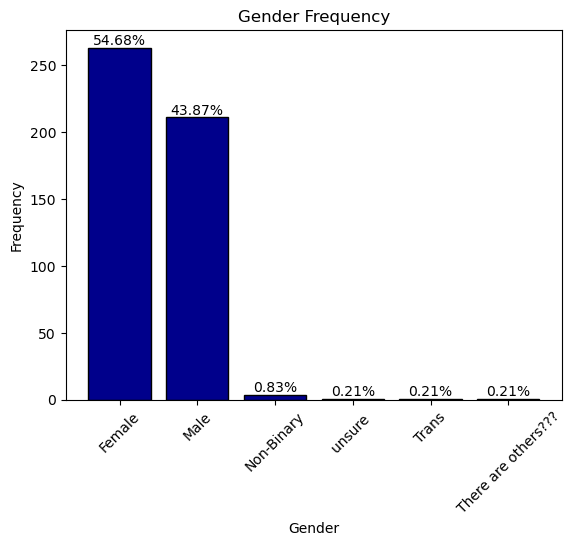

In [35]:

frequency_table = data['Gender'].value_counts().reset_index()
frequency_table.columns = ['Gender', 'Frequency']
total_count = len(data)
frequency_table['Percentage'] = (frequency_table['Frequency'] / total_count) * 100
fig, ax = plt.subplots()
bars = plt.bar(frequency_table['Gender'], frequency_table['Frequency'], width=0.8, edgecolor='k', color='darkblue')
for bar, percentage in zip(bars, frequency_table['Percentage']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Occupation Frequency 

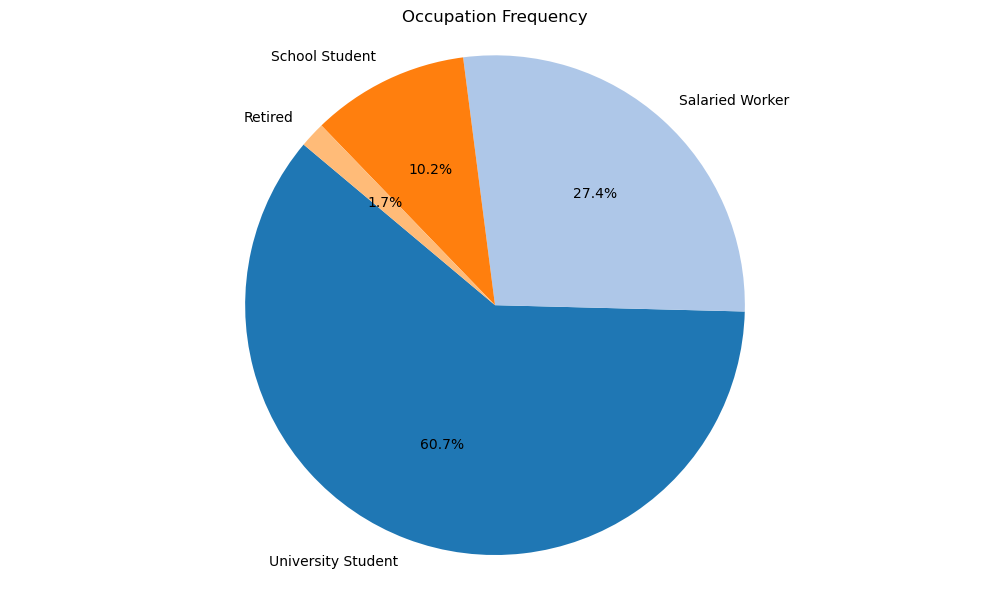

In [40]:

frequency_table = data['Occupation'].value_counts().reset_index()
frequency_table.columns = ['Occupation', 'Frequency']
plt.figure(figsize=(10, 6))  
plt.pie(frequency_table['Frequency'], labels=frequency_table['Occupation'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

plt.title('Occupation Frequency')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [41]:
# Relationship Status

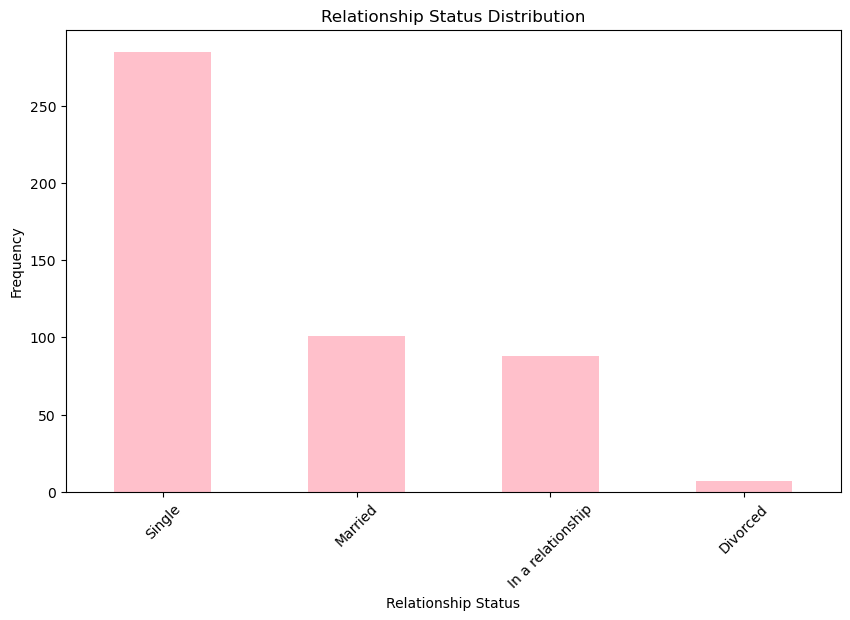

In [42]:

plt.figure(figsize=(10, 6))
data['Relationship Status'].value_counts().plot(kind='bar', color='pink')
plt.title('Relationship Status Distribution')
plt.xlabel('Relationship Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [43]:

import sys
!{sys.executable} -m pip install scipy
import pandas as pd
from scipy.stats import pearsonr 

In [44]:
# Hours per Day

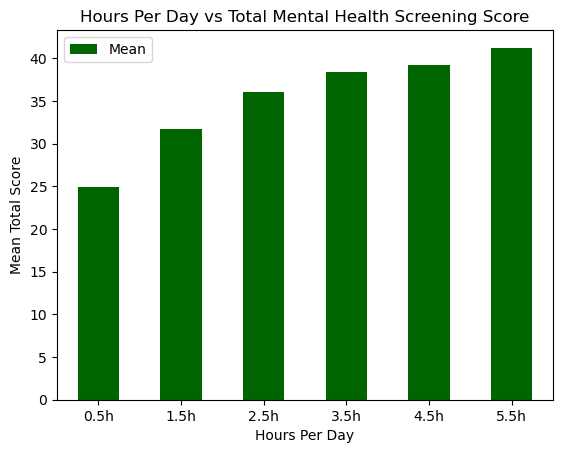

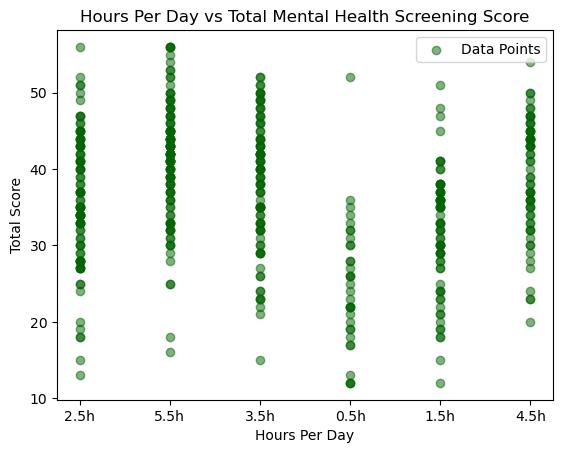

In [45]:

summary_stats = data.groupby('Hours Per Day')['Total Score'].agg(['mean'])
mean_plot = summary_stats['mean'].plot(kind='bar', color='darkgreen', label='Mean')
plt.xlabel('Hours Per Day')
plt.ylabel('Mean Total Score')
plt.title('Hours Per Day vs Total Mental Health Screening Score')
plt.xticks(rotation=0)
plt.legend()
plt.show()

plt.scatter(data['Hours Per Day'], data['Total Score'], color='darkgreen', label='Data Points', alpha=0.5)
plt.xlabel('Hours Per Day')
plt.ylabel('Total Score')
plt.title('Hours Per Day vs Total Mental Health Screening Score')
plt.legend()
plt.show()

In [49]:
data.columns


Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Hours Per Day', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score', 'Total Score', 'Platforms',
       'Age Group'],
      dtype='object')

Occupation
Retired               3.375000
Salaried Worker       2.553030
School Student        3.785714
University Student    3.732877
Name: Hours Per Day, dtype: float64


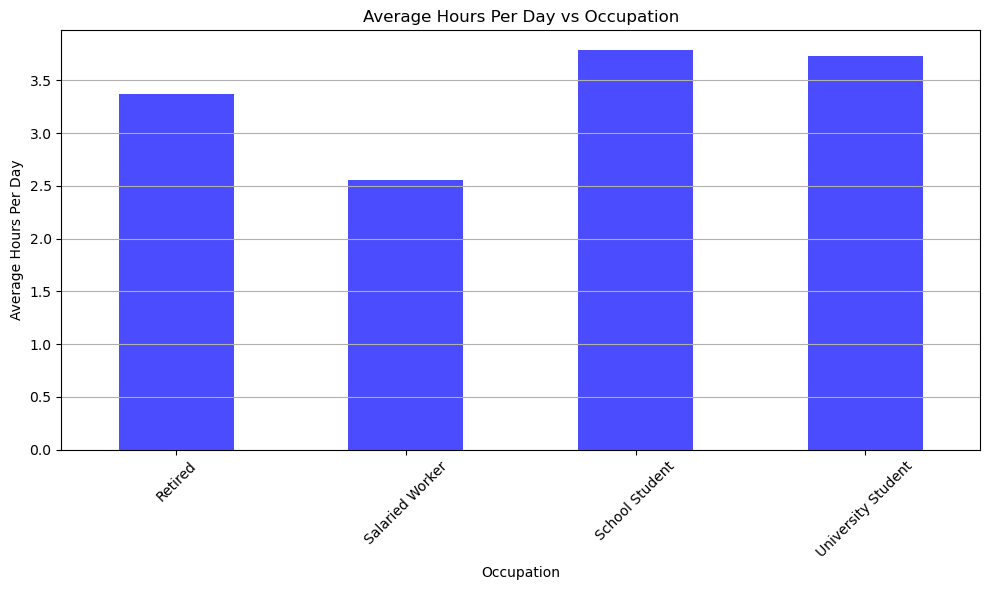

In [51]:

data['Hours Per Day'] = data['Hours Per Day'].str.replace('h', '').astype(float)
avg_hours_per_day = data.groupby('Occupation')['Hours Per Day'].mean()
print(avg_hours_per_day)
plt.figure(figsize=(10, 6)) 
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)  
plt.title('Average Hours Per Day vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Hours Per Day')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

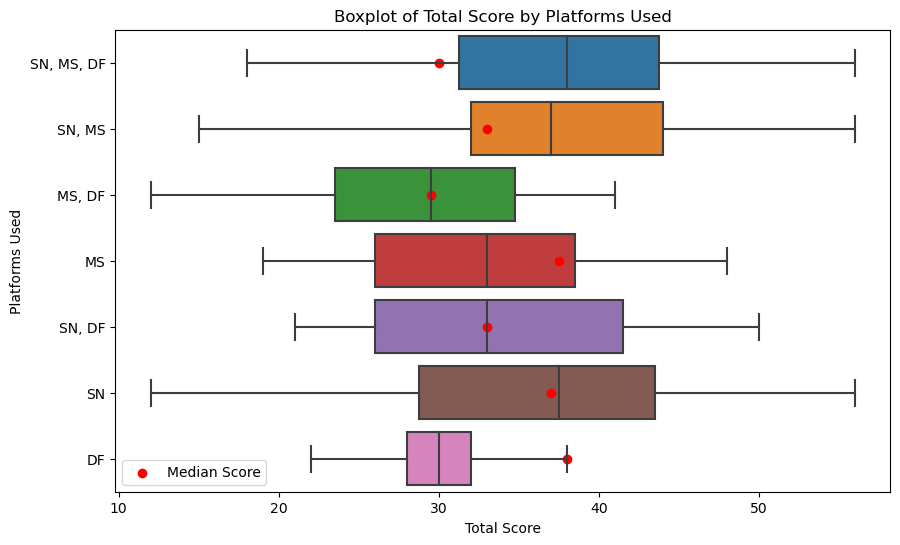

In [52]:

median_scores = data.groupby('Platforms')['Total Score'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(y='Platforms', x='Total Score', data=data, showfliers=False)
plt.scatter(y=median_scores['Platforms'], x=median_scores['Total Score'], color='red', marker='o', label='Median Score')
plt.xlabel('Total Score')
plt.ylabel('Platforms Used')
plt.title('Boxplot of Total Score by Platforms Used')
plt.legend()
plt.show()


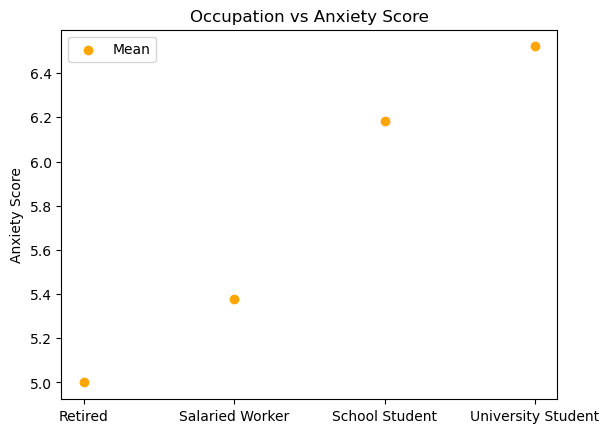

In [53]:

summary_stats = data.groupby('Occupation')['Anxiety Score'].mean().reset_index()

plt.scatter(summary_stats['Occupation'], summary_stats['Anxiety Score'], color='orange', label='Mean')

plt.ylabel('Anxiety Score')  
plt.title('Occupation vs Anxiety Score')  

plt.legend()
plt.show()

# Model Evaluation

In [56]:
# Print the column names in the DataFrame
print(data.columns)


Index(['Age', 'Gender', 'Relationship Status', 'Occupation',
       'Social Media User?', 'Hours Per Day', 'ADHD Score', 'Anxiety Score',
       'Self Esteem Score', 'Depression Score', 'Total Score', 'Platforms',
       'Age Group'],
      dtype='object')


In [61]:
print(data.dtypes)


Age                        int64
Gender                    object
Relationship Status       object
Occupation                object
Social Media User?        object
Hours Per Day            float64
ADHD Score                 int64
Anxiety Score              int64
Self Esteem Score          int64
Depression Score           int64
Total Score                int64
Platforms                 object
Age Group               category
Mental_Health_Status        bool
Social_Media_Data         object
dtype: object


# Random Forest,Logistic,Decsion Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Model Training and prediction 

In [ ]:

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

In [ ]:
# Model Evalutaion

In [86]:

rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)


Random Forest Accuracy: 0.5769230769230769
Logistic Regression Accuracy: 0.44871794871794873
Decision Tree Accuracy: 0.4423076923076923


D:\Anaconda_installation\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


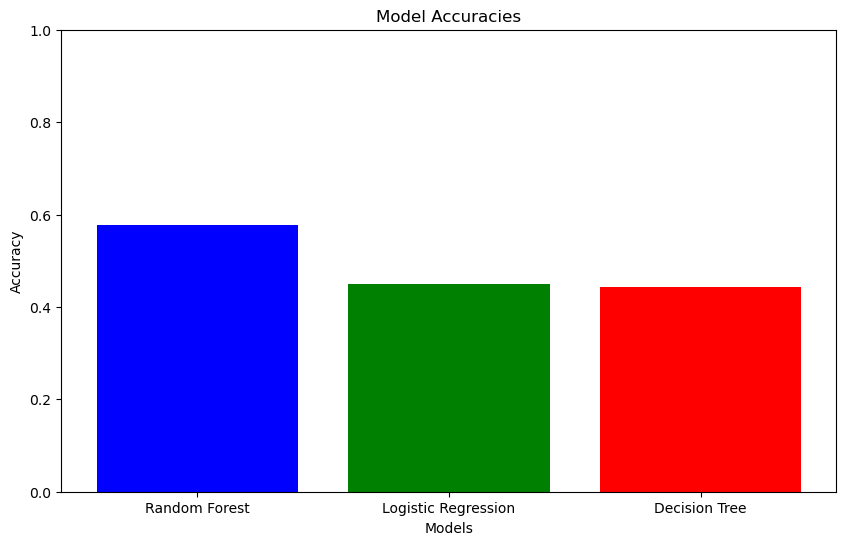

In [91]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'Logistic Regression', 'Decision Tree']
accuracies = [rf_accuracy, lr_accuracy, dt_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Grid search parameter

In [ ]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}


In [89]:

svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_
svm_pred = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.8461538461538461


In [ ]:
# Plotting the bar graph

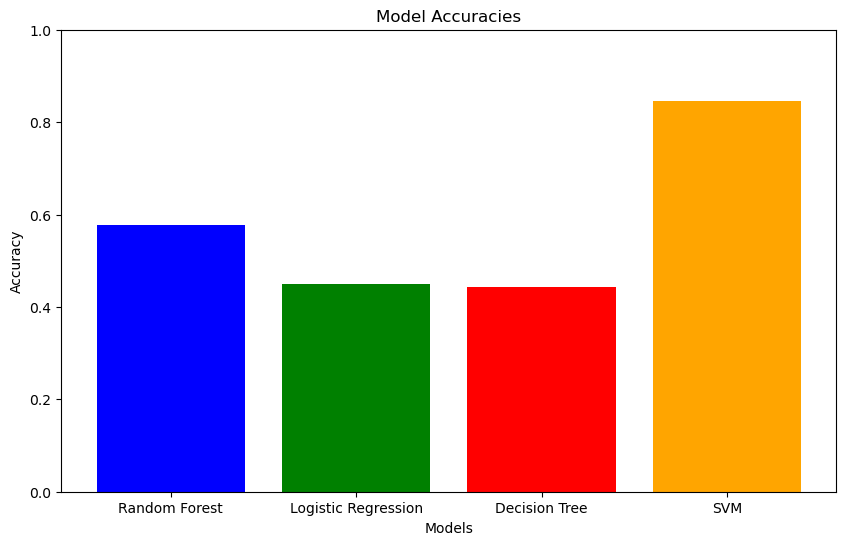

In [92]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [rf_accuracy, lr_accuracy, dt_accuracy, svm_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.show()
